In [1]:
import time
import datetime
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import tushare as ts
ts.set_token('29eaf3bcac23df4c6d025de157ab2d53beead3391fbe6e83b4ebcb6c')
pro = ts.pro_api()

import mpl_finance as mpf
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.pylab import date2num
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import seaborn as sns
sns.set()
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'SimHei'

D:\Users\admin\Anaconda3\envs\py37-stock\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [2]:
from mylab.stock.myread import getStock
from mylab.stock.myread import getIndex
from mylab.stock.myread import getIndexBasic
from mylab.stock.myread import getStockBasic
from mylab.stock.myread import readData
from mylab.stock.myread import mergeDailyWeeklyMonthly
from mylab.stock.myread import mergeStockIndex
from mylab.stock.myread import getIndustry

from mylab.stock.myfeature import getMacd
from mylab.stock.myfeature import getKdj
from mylab.stock.myfeature import getMa

from mylab.stock.myplot import plotVol
from mylab.stock.myplot import plotCandle
from mylab.stock.myplot import plotMacd
from mylab.stock.myplot import plotKdj

from mylab.stock.mygoldBS import getGoldBS
from mylab.stock.mygoldBS import plotStock
from mylab.stock.mygoldBS import plotGoldBS
from mylab.stock.mygoldBS import displaySelect

In [3]:
SAVE_CSV = True
LOCAL = not True

GET_DAILY = True
SELECT_STOCK = True

start_date = "20160101"
end_date = "20200413"

# get all Stocks Info

In [4]:
#获取基础信息数据，包括股票代码、名称、上市日期、退市日期等

pool_df = getStockBasic(LOCAL = True)
pool_df = pd.read_csv("./data/stock/blue_stock_rank_3.csv" )

print('获得上市股票总数：', len(pool_df)-1)
pool_df.head()

获得上市股票总数： 352


,ts_code,total_revenue_20150930,operate_profit_20150930,total_cogs_20150930,n_income_20150930,n_income_attr_p_20150930,total_assets_20150930,total_hldr_eqy_inc_min_int_20150930,total_hldr_eqy_exc_min_int_20150930,ROE1_20150930,...,pb,ps,ps_ttm,dv_ratio,dv_ttm,total_share,float_share,free_share,total_mv,circ_mv
0,000001.SZ,7.115200e+10,2.330500e+10,4.784700e+10,1.774000e+10,1.774000e+10,2.599060e+12,1.571360e+11,1.571360e+11,11.289584,...,0.9346,1.8498,1.8498,0.9756,0.9756,1.940592e+06,1.940575e+06,860111.1956,2.551878e+07,2.551856e+07
1,000026.SZ,2.467881e+09,1.352111e+08,2.333110e+09,1.070606e+08,1.066149e+08,3.852330e+09,1.708490e+09,1.704829e+09,6.266387,...,1.4785,1.0595,1.0595,2.2358,2.2358,4.429689e+04,3.566923e+04,19371.4963,3.924704e+05,3.160294e+05
2,000069.SZ,1.743661e+10,3.859597e+09,1.397188e+10,2.860959e+09,2.491276e+09,1.031446e+11,3.389503e+10,2.997892e+10,8.440645,...,0.8593,1.1126,1.0020,4.5951,4.5951,8.202506e+05,7.035147e+05,420014.0017,5.356237e+06,4.593951e+06
3,000078.SZ,8.221318e+09,4.337172e+08,8.094439e+09,3.932218e+08,3.507192e+08,1.216369e+10,2.170980e+09,1.829979e+09,18.112644,...,2.0881,0.3469,0.3227,0.4149,0.4149,2.762583e+05,2.621961e+05,140551.5680,1.331565e+06,1.263785e+06
4,000099.SZ,9.120046e+08,1.642831e+08,7.492174e+08,1.465861e+08,1.442167e+08,4.712436e+09,2.824300e+09,2.792370e+09,5.190176,...,1.1565,2.4131,2.4131,0.4006,0.4006,6.060704e+04,6.060704e+04,37195.0946,3.781879e+05,3.781879e+05


# update all stocks daily

0

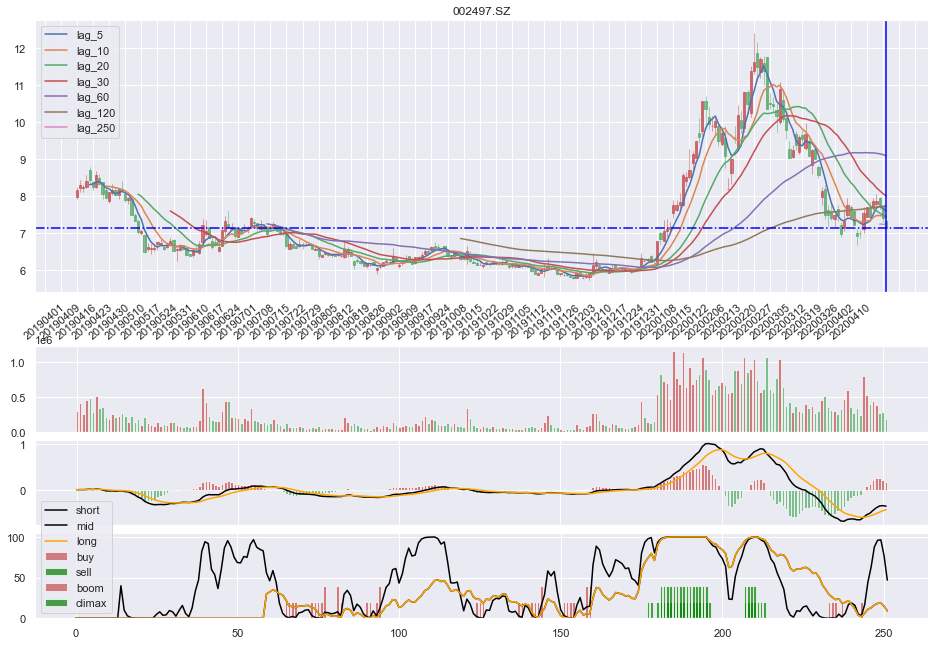

In [5]:
start_date = "20190401"
# end_date = "20200101"
stock_code = "002497.SZ"
save_dir = "./output/select_by_3_percent/"

stock_df = getStock(stock_code,start_date, end_date, LOCAL = True)
stock_df = getGoldBS(stock_df)
plotStock(stock_df ,SAVE = False, save_dir =save_dir)

In [6]:
 =

SyntaxError: invalid syntax (<ipython-input-6-9ae22869553b>, line 1)

# select stocks by 3 percent

In [ ]:
def selectStockBy3Percent(df):
    select_df = stock_df.loc[stock_df.buy_signal.values>0,:]
    return select_df

In [ ]:
start_date = "20191201"
# end_date = "20200323"
print("end date: ",end_date)

all_select_df = pd.DataFrame()
err_num = 0
for i in range(2):  # len(pool_df)
    stock_code = pool_df.loc[i,"ts_code"]
    stock_name = pool_df.loc[i,"name"]
    if stock_code[0] == "0":
        try:
            stock_df = getStock(stock_code,start_date, end_date, LOCAL = True)
            stock_df = getGoldBS(stock_df)
            select_df = selectStockBy3Percent(stock_df )  # stock         
        except:
            err_num = err_num +1
            pass
        if len(select_df) > 0:  
            all_select_df  = pd.concat([all_select_df,select_df],axis = 0)
print("num of err：",err_num)
all_select_df.to_csv("./output/"+"stock_selected_by_3_percent.csv", index = False)
print(all_select_df.shape)
print("end date: ",end_date)
all_select_df = all_select_df.loc[all_select_df["trade_date"] == end_date,:]
stocks_code = all_select_df.ts_code.values
print(all_select_df.shape)
all_select_df.head()

In [ ]:
# all_select_df.to_csv("./output/"+"stock_selected_by_3_percent.csv", index = False)
all_select_df = pd.read_csv("./output/"+"stock_selected_by_3_percent.csv")
all_select_df["trade_date"] = all_select_df["trade_date"].astype(str)
print(all_select_df.shape)
print("end date: ",end_date)
# all_select_df = all_select_df.loc[all_select_df["trade_date"] == end_date,:]
all_select_df.to_csv("./output/"+"stock_selected_by_3_percent_"+end_date+".csv", index = False)
stocks_code = all_select_df.ts_code.values
print(all_select_df.shape)
all_select_df.head()

In [ ]:
save_dir = "./output/select_by_3_percent/"
start_date = "20140101"
# end_date = "20200323"

# all_select_df = pd.read_csv("./output/"+"stock_selected_by_industry_KDJ.csv")
# stocks_code = ["002497.SZ"]  # stock 
for stock_code in stocks_code:
    stock_df = getStock(stock_code,start_date, end_date , LOCAL = True)
    stock_df = getGoldBS(stock_df)
    select_df = selectStockBy3Percent(stock_df )  # stock 
    print(stock_code,len(select_df))
    for i in range(len(select_df)):
        ix = select_df.index[i]
        trade_date = select_df.trade_date.values[i]
        display_df = displaySelect(stock_df,ix, trade_date= trade_date, save_dir = save_dir )
        plt.close()                